Лабораторная работа №1. Предварительная обработка данных

Для начала импортируем библиотеку pandas для последующей работы с данными.

In [30]:
import pandas as pd

Далее мы подключаем в DataFrame данные из файла csv и считываем их. Для выполнения лабораторной работы использовался датасет из Kaggle.com под названием "Pokemon with stats".

In [31]:
pokemon_df = pd.read_csv('C:/Users/User/Downloads/archive/Pokemon.csv') 
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Видно, что размер нашего датафрейма - 13 столбцов и 800 строк. Также мы можем вывести для примера случайные 10 строк датафрейма.

In [32]:
pokemon_df.sample(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
266,247,Pupitar,Rock,Ground,410,70,84,70,65,70,51,2,False
732,664,Scatterbug,Bug,NaN,200,38,35,40,27,25,35,6,False
503,453,Croagunk,Poison,Fighting,300,48,61,40,61,40,50,4,False
458,413,WormadamPlant Cloak,Bug,Grass,424,60,59,85,79,105,36,4,False
500,450,Hippowdon,Ground,NaN,525,108,112,118,68,72,47,4,False
694,633,Deino,Dark,Dragon,300,52,65,50,45,50,38,5,False
67,62,Poliwrath,Water,Fighting,510,90,95,95,70,90,70,1,False
403,368,Gorebyss,Water,NaN,485,55,84,105,114,75,52,3,False
701,640,Virizion,Grass,Fighting,580,91,90,72,90,129,108,5,True
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False


С помощью df.info() мы можем вывести краткую сводку информации по нашему датафрейму.

In [33]:
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


После просмотра информации о датафрейме видно следующее:

* в датафрейме 13 столбцов
* три из них имеют тип `object` (аналогия `string` из Python)
* один из них имеет тип `bool`
* девять столбцов имеют тип `int64`
* всего в датафрейме 800 строк
* в столбцe `Type2` есть пропуски (`NaN`)
* объем занимаемый датафреймом 75.9+ KB (эта информация может быть полезна, чтобы заранее представить какие операции с датафреймом вы сможете выполнять с учетом доступной вам оперативной памяти)

Для удобства следующей работы переименуем столбцы Type 1, Type 2, Sp. Atk, Sp. Def в Type_1, Type_2, Sp.Atk, Sp.Def соответственно для того, чтобы не путаться с пропусками. И вызовем функцию df.rename для проверки переименования.

In [34]:
pokemon_df.rename(columns={'Type 1':'Type_1'}, inplace=True)
pokemon_df.rename(columns={'Type 2':'Type_2'}, inplace=True)
pokemon_df.rename(columns={'Sp. Atk':'Sp.Atk'}, inplace=True)
pokemon_df.rename(columns={'Sp. Def':'Sp.Def'}, inplace=True)

In [35]:
pokemon_df.columns

Index(['#', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp.Atk', 'Sp.Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

В итоге переименования прошли успешно и сохранились, далее разберемся с пропусками в строках. Если мы произведем удаление, то почти половина датафрейма исчезнет, и станет меньше информации и могут появиться некорректные результаты. Поэтому мы заменяем нулевые значения в Type_2 на 'none'.

In [36]:
pokemon_df.fillna('None',inplace=True)

In [37]:
pokemon_df

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


После изменения вызвали датафрейм для проверки сохранения изменения, в итоге, изменения успешно произошли и сохранились, и теперь вместо нулевых значениях 'NaN' находятся значения 'None'.

Следующим шагом мы проверим наш датафрейм на наличие дубликатов.

In [38]:
pokemon_df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
       ...  
795    False
796    False
797    False
798    False
799    False
Length: 800, dtype: bool

В ходе проверки выяснилось, что в данных нет дубликатов. Теперь мы можем применить к нашему датафрейму стандартизацию.

In [39]:
pokemon_df['Total'] = (pokemon_df['Total'] - pokemon_df['Total'].mean()) / pokemon_df['Total'].std()
pokemon_df['HP'] = (pokemon_df['HP'] - pokemon_df['HP'].mean()) / pokemon_df['HP'].std()
pokemon_df['Attack'] = (pokemon_df['Attack'] - pokemon_df['Attack'].mean()) / pokemon_df['Attack'].std()
pokemon_df['Defense'] = (pokemon_df['Defense'] - pokemon_df['Defense'].mean()) / pokemon_df['Defense'].std()
pokemon_df['Sp.Atk'] = (pokemon_df['Sp.Atk'] - pokemon_df['Sp.Atk'].mean()) / pokemon_df['Sp.Atk'].std()
pokemon_df['Sp.Def'] = (pokemon_df['Sp.Def'] - pokemon_df['Sp.Def'].mean()) / pokemon_df['Sp.Def'].std()
pokemon_df['Speed'] = (pokemon_df['Speed'] - pokemon_df['Speed'].mean()) / pokemon_df['Speed'].std()

In [40]:
pokemon_df

,#,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,-0.976155,-0.950032,-0.924328,-0.796655,-0.238981,-0.248033,-0.801002,1,False
1,2,Ivysaur,Grass,Poison,-0.250931,-0.362595,-0.523803,-0.347700,0.219422,0.290974,-0.284837,1,False
2,3,Venusaur,Grass,Poison,0.749377,0.420654,0.092390,0.293665,0.830626,1.009651,0.403383,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,1.582967,0.420654,0.646964,1.576395,1.502951,1.728328,0.403383,1,False
4,4,Charmander,Fire,None,-1.051178,-1.185007,-0.831899,-0.989065,-0.391782,-0.787041,-0.112782,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,1.374569,-0.754220,0.646964,2.442237,0.830626,2.806344,-0.628947,6,True
796,719,DiancieMega Diancie,Rock,Fairy,2.208159,-0.754220,2.495543,1.159507,2.664239,1.368990,1.435713,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,1.374569,0.420654,0.955061,-0.443905,2.358637,2.087667,0.059273,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,2.041441,0.420654,2.495543,-0.443905,2.969841,2.087667,0.403383,6,True


После стандартизации мы вызвали датафрейм и увидели, что изменения прошли успешно. Теперь мы будем исследовать отношения между нашими количественными переменными с помощью графиков и корреляции. Для этого сначала установим библиотеку mlxtend.

In [41]:
!pip install mlxtend

После установки теперь можем построить графики и корреляцию.

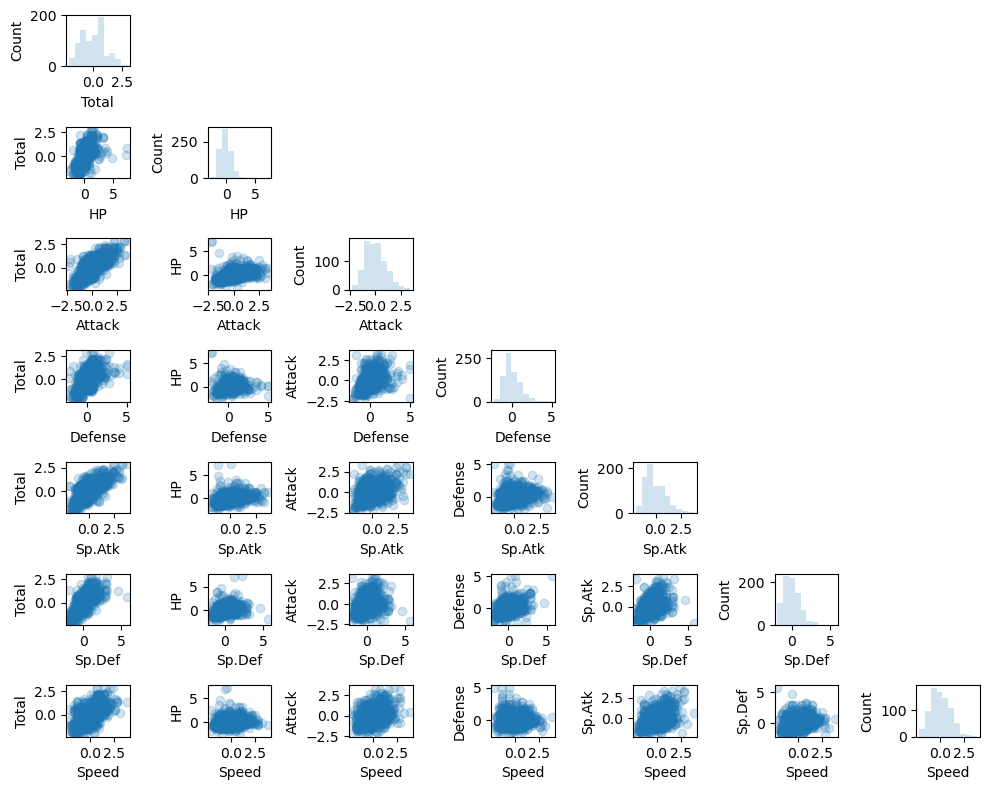

In [42]:
from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed']
scatterplotmatrix(pokemon_df[cols].values, figsize=(10,8), names=cols, alpha=0.2)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_12524\2478329348.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pokemon_df.corr(), annot=True)


<Axes: >

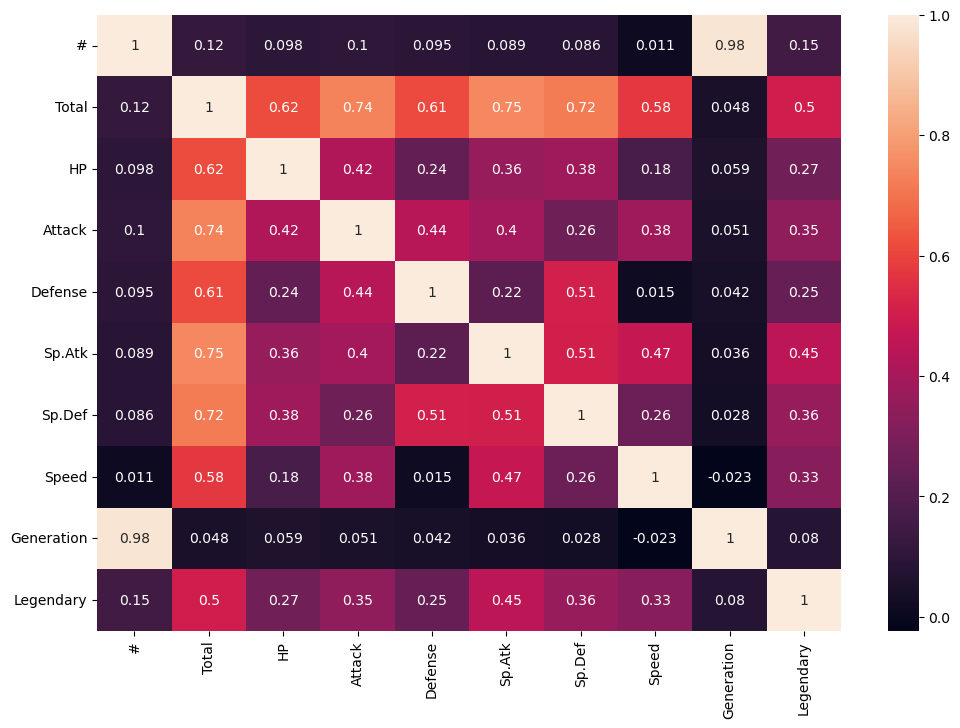

In [43]:
import seaborn as sns
plt.figure(figsize=[12,8])
sns.heatmap(pokemon_df.corr(), annot=True)

По результатам видно:
* сильная линейная зависимость существует между общим значением и атакой, общим значением и особой атакой, общим значением и особой защитой, поколением и номером в покедексе;
* средняя линейная зависимость - между общим значением и здоровьем, общим значением и скоростью, общим значением и защитой, общим значением и легендарностью, здововьем и атакой, здоровьем и особой атакой, здоровьем и особой защитой, атакой и защитой, атакой и особой атакой, атакой и скоростью, атакой и легендарностью, защитой и особой защитой, особой атакой и особой защитой, особой атакой и скоростью, особой атакой и легендарностью, особой защитой и легендарностью, скоростью и легендарностью;
* слабая линейная зависимость - между здоровьем и защитой, здоровьем и скоростью, здоровью и легендарностью, атакой и особой защитой, защитой и особой атакой, защитой и легендарностью, особой защитой и скоростью;
* очень слабая линейная зависимость(значит практически не зависят друг от друга) - между номером в покедексе и общим значением, здоровьем, атакой, защитой, особой атакой и защитой, скоростью, легендарностью, между общим значением и поколением, между здоровьем и поколением, между атакой и поколением, между защитой и скоростью, между защитой и поколением, между особой атакой и поколением, между особой защитой и поколением, между скоростью и поколением, между поколением и легендарностью.

Значит, что от номера покемона в покедекса не зависит ничего, кроме поколения, а защита и скорость никак друг с другом не взаимоосвязаны. Остальные характеристики имеют между собой определенные зависимости.
